In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *

model_directory = './job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/light_chem/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], k))

gather_df = gather_df.dropna(axis=0)

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 180))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

#get tukey results
tukey_dict = tukey_multi_metrics(gather_df, col_indices=col_indices)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
#setup comparison matrix and overlaps
tukey_dict = tukey_multi_metrics(gather_df)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
mm_comp_dicts = get_mean_median_comps(gather_df)
agg_comp_dict = get_agg_comp(mm_comp_dicts, tukey_analysis_dict, mean_w=0, median_w=1, tukey_w=100)
overlapping_models = get_overlap(agg_comp_dict, N=1)


/home/sliu426/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median for 180 results
  r = func(a, **kwargs)
/home/sliu426/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median for 84 results
  r = func(a, **kwargs)
/usr/local/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1730: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self.ix[indexer]
/usr/local/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:780: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_lowerdim(tup)


---
## Uninversal Confidence Intervals

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


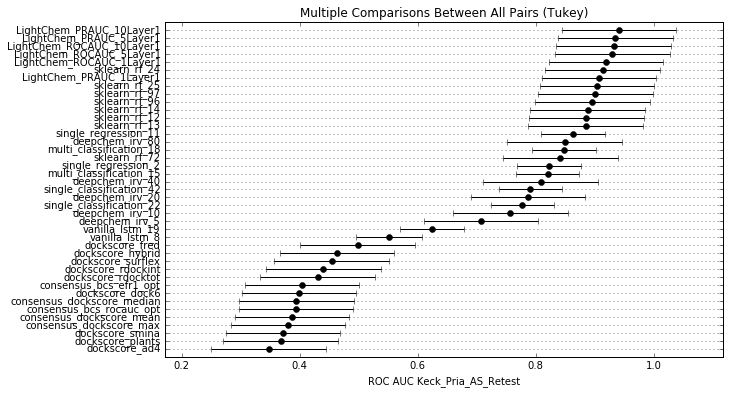

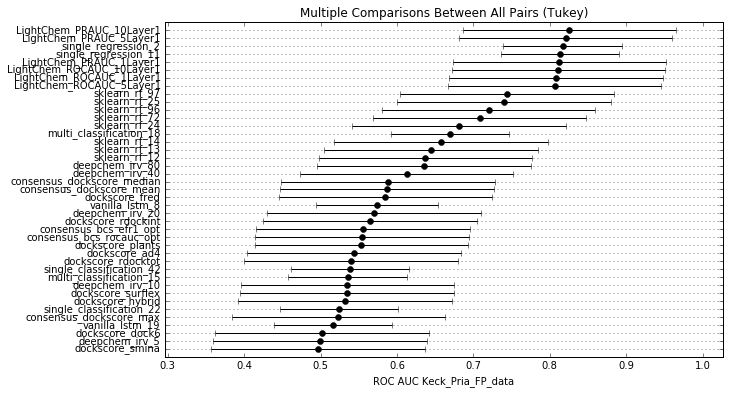

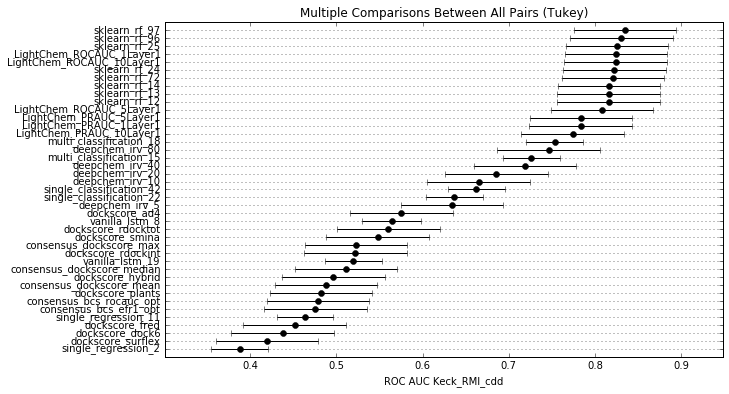

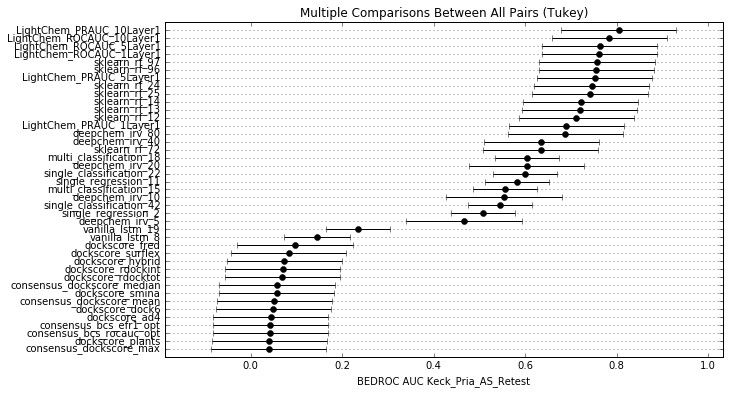

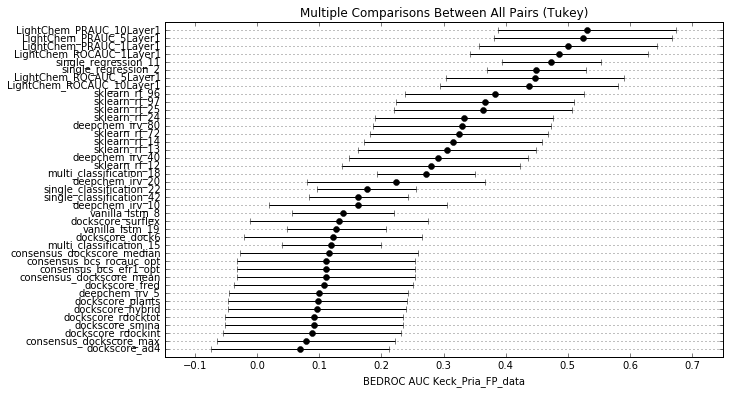

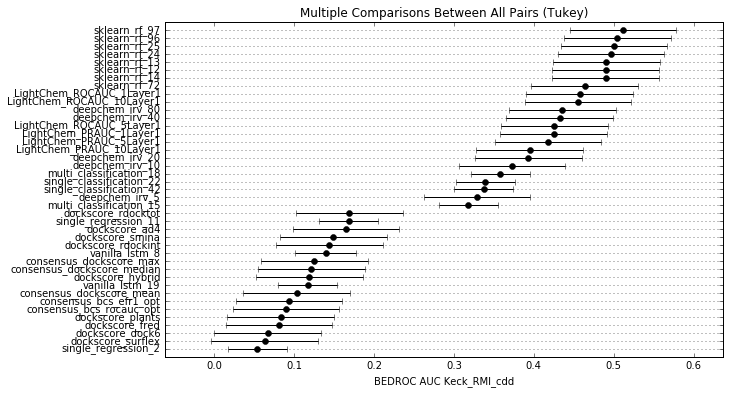

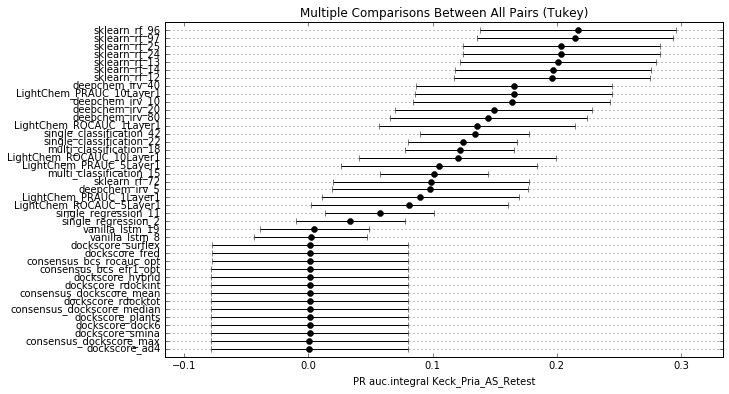

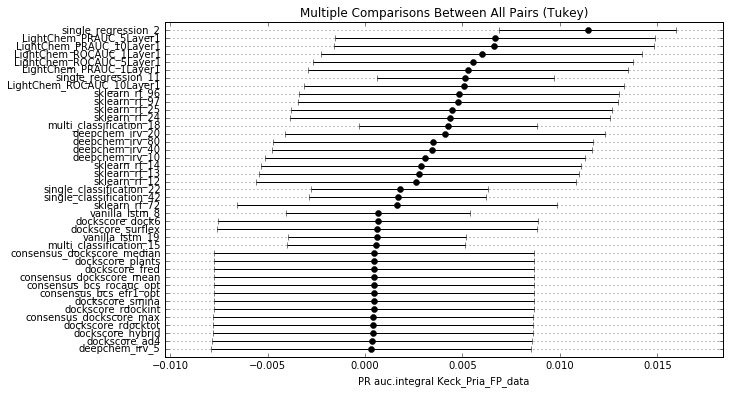

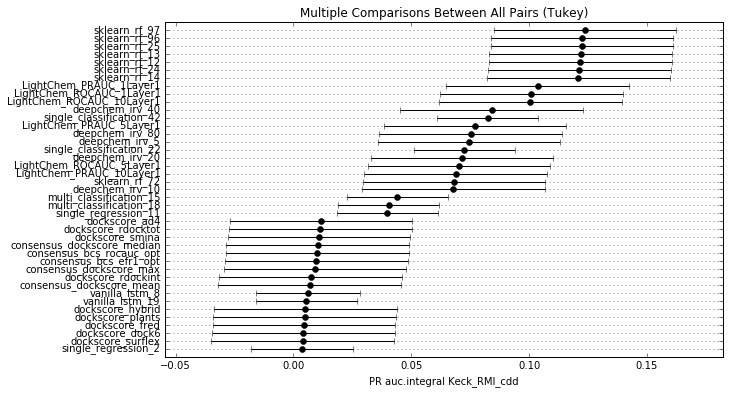

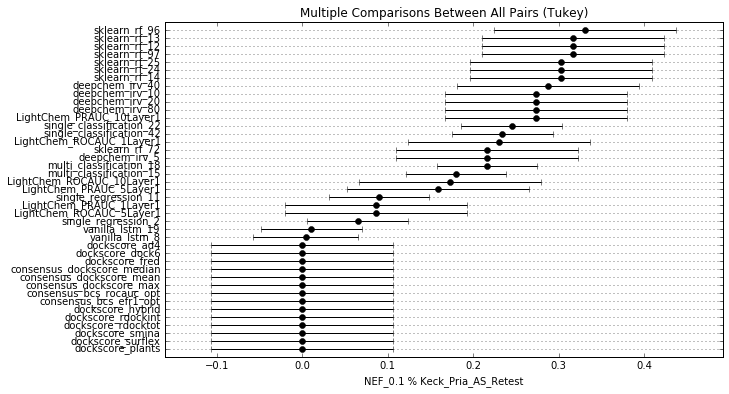

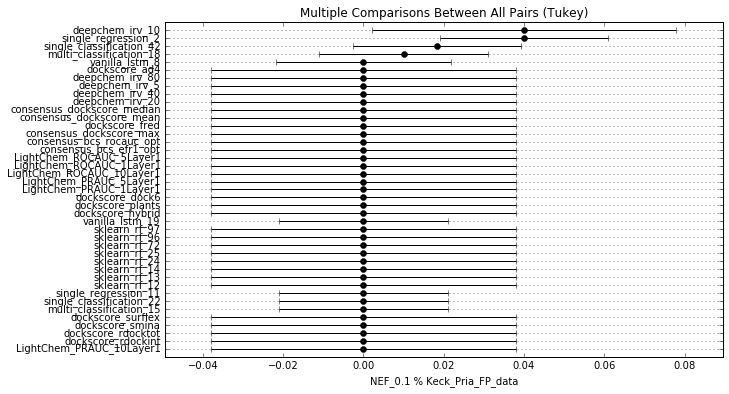

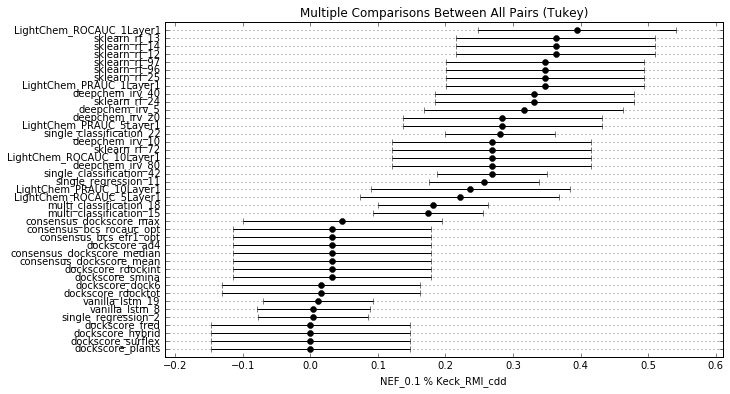

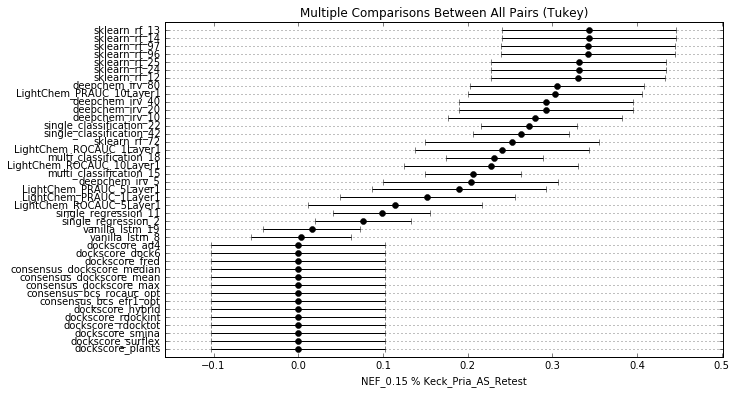

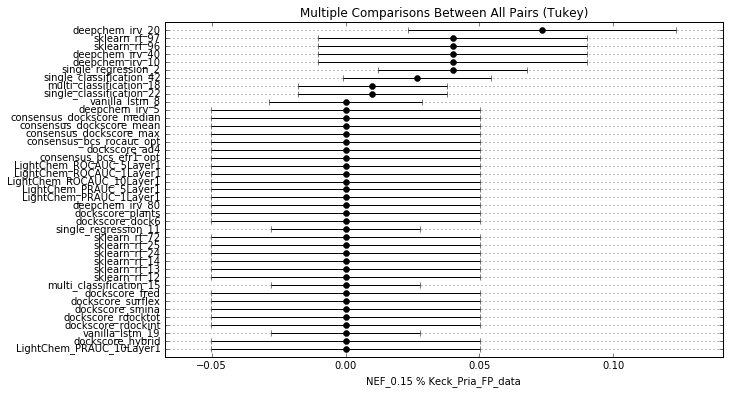

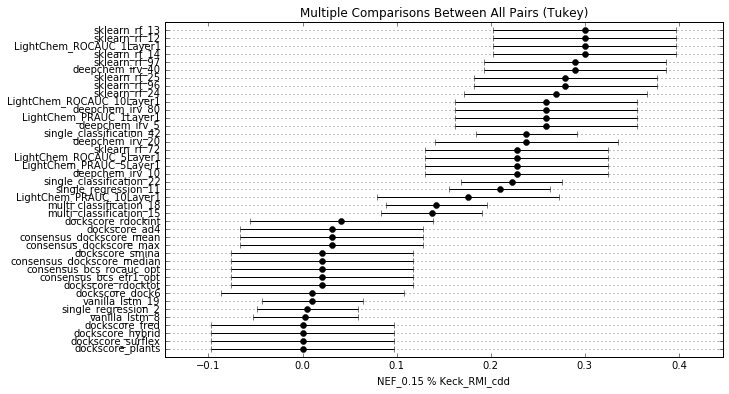

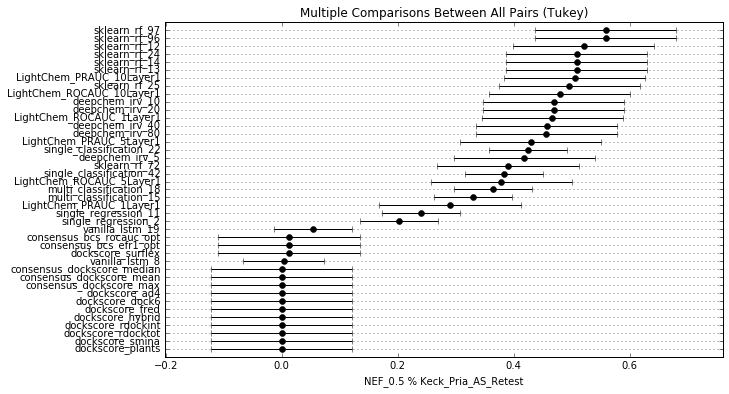

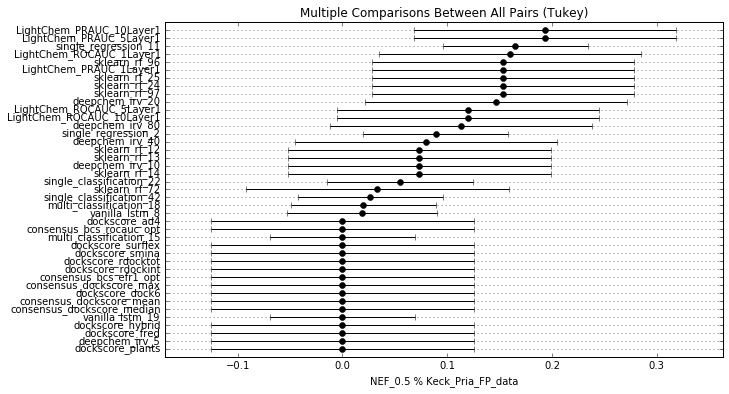

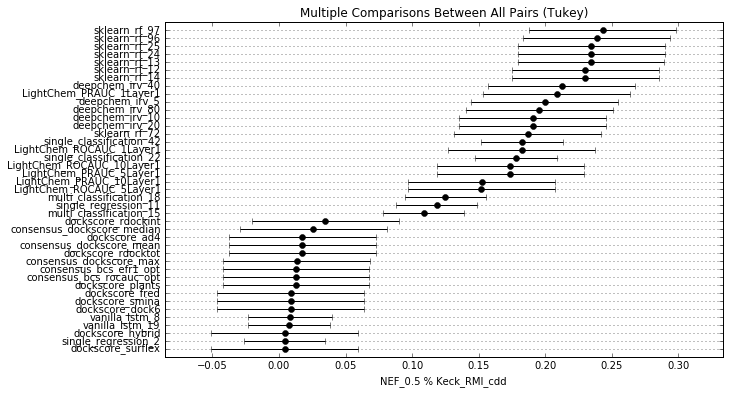

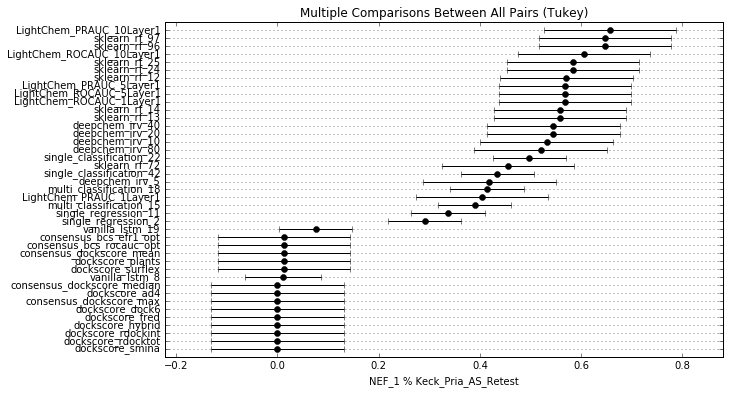

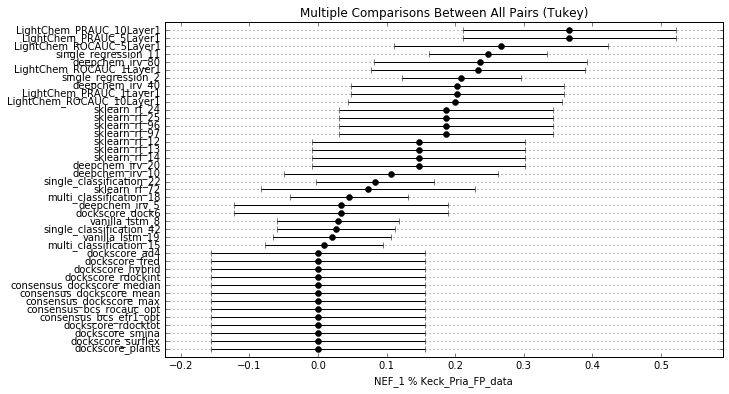

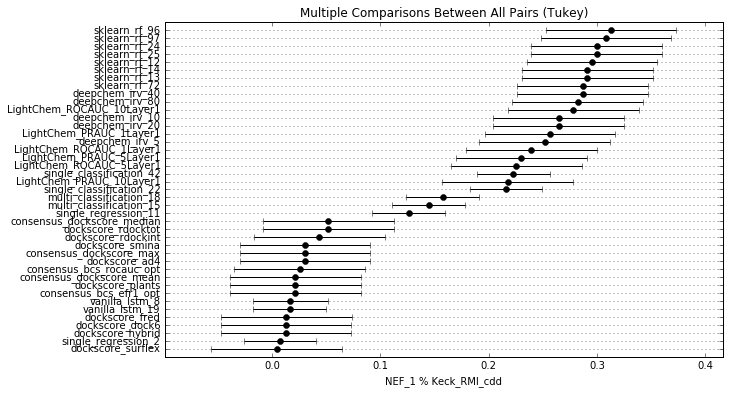

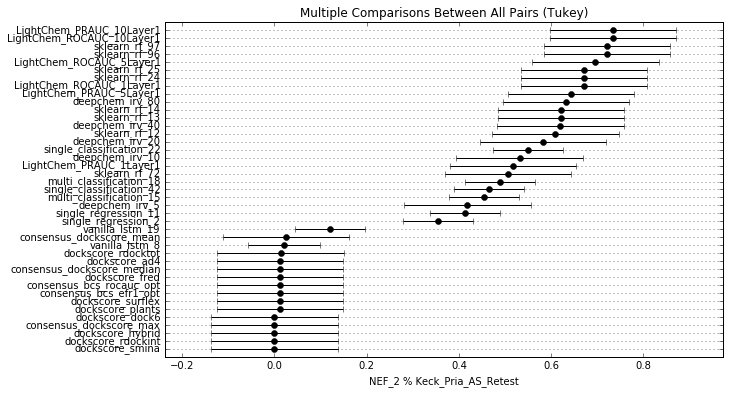

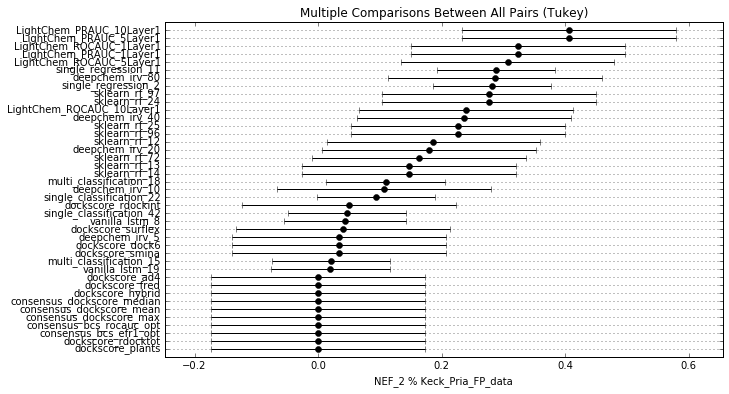

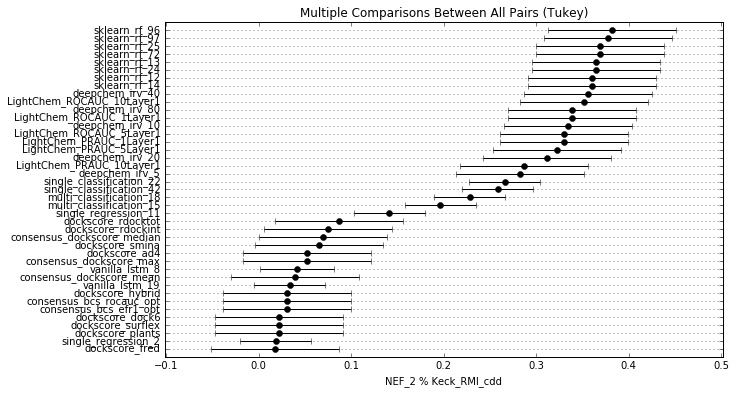

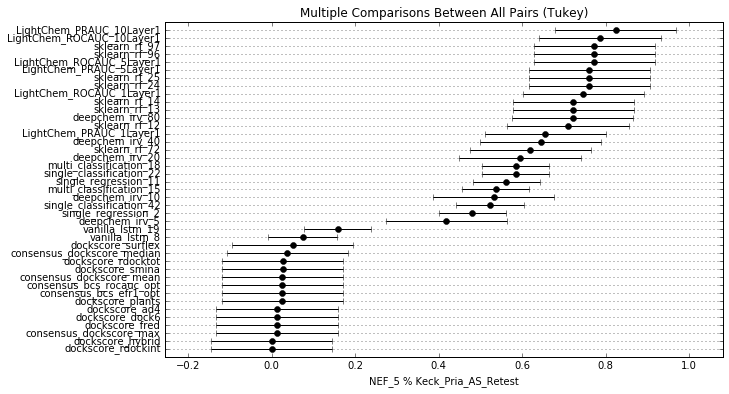

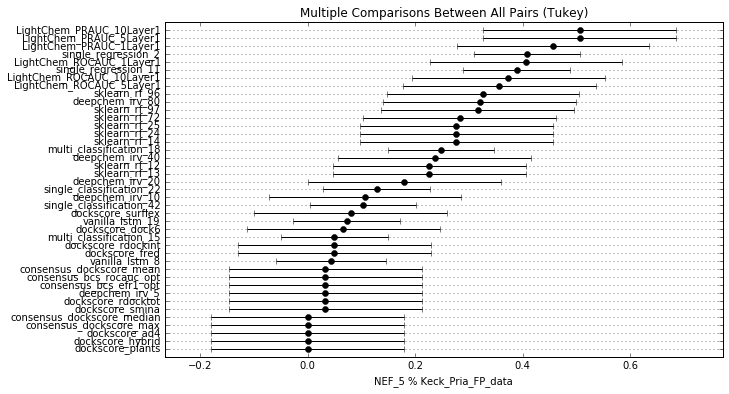

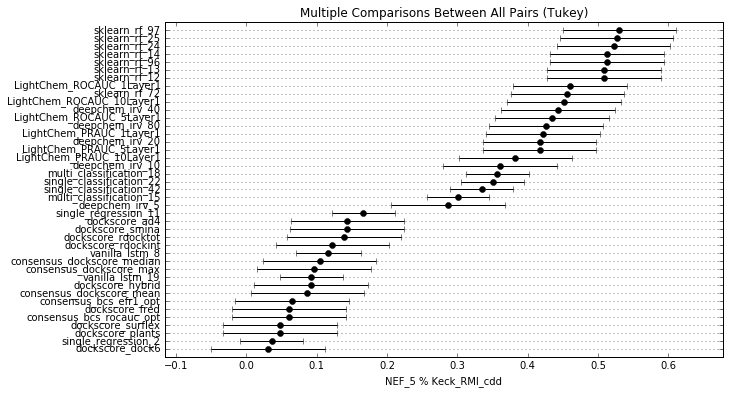

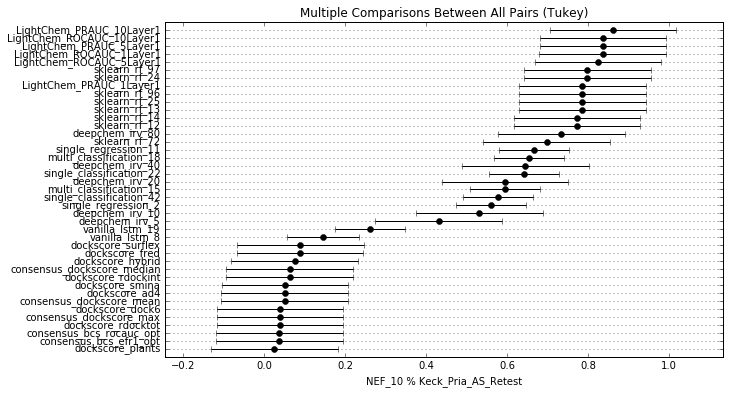

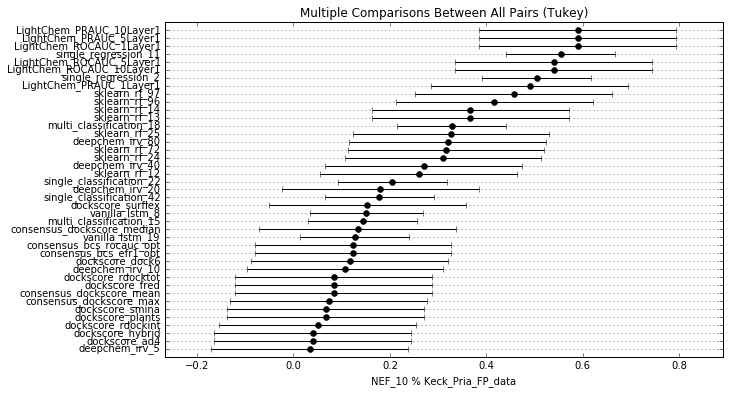

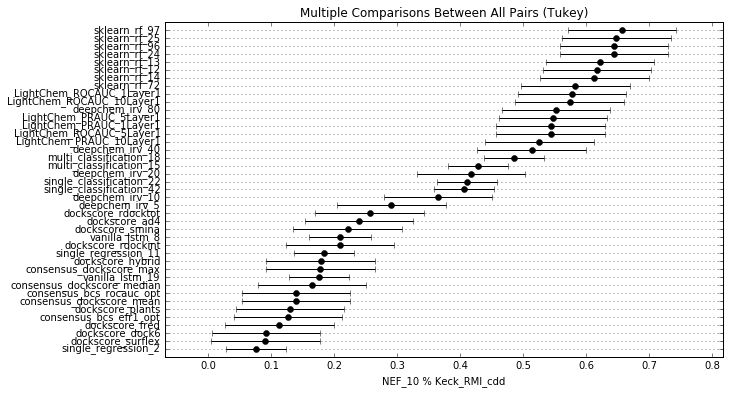

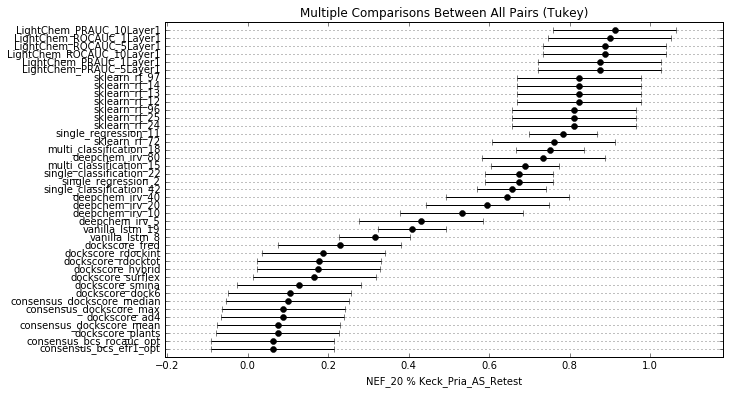

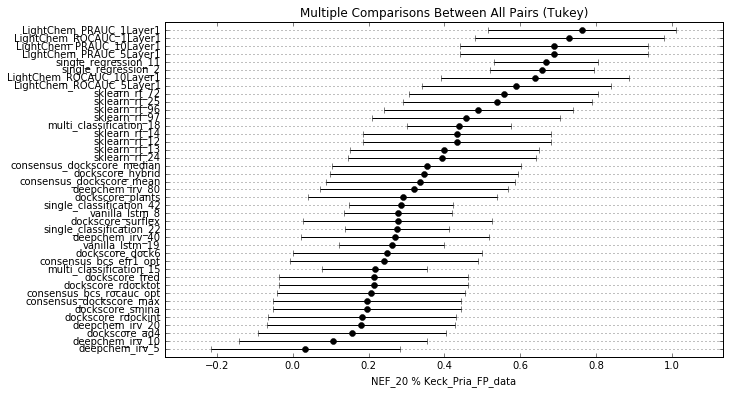

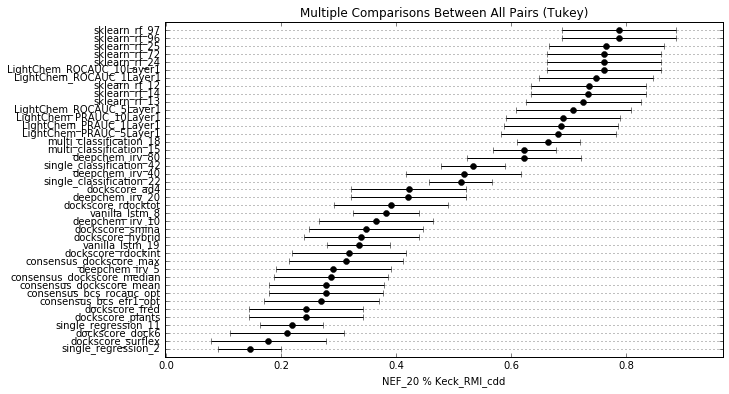

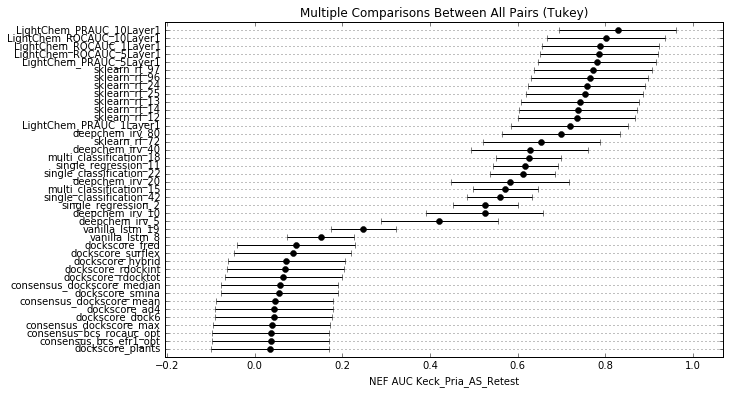

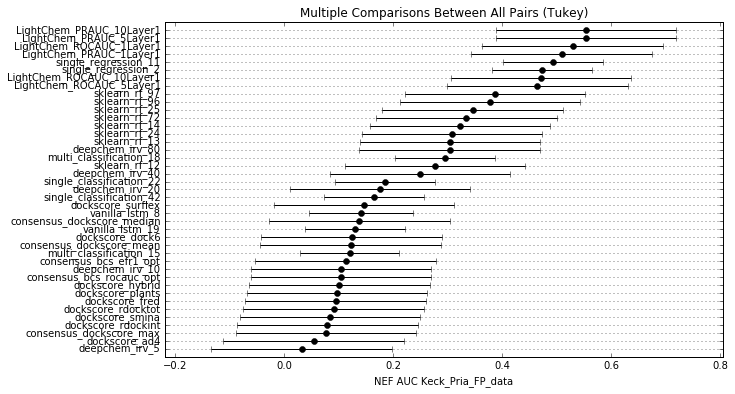

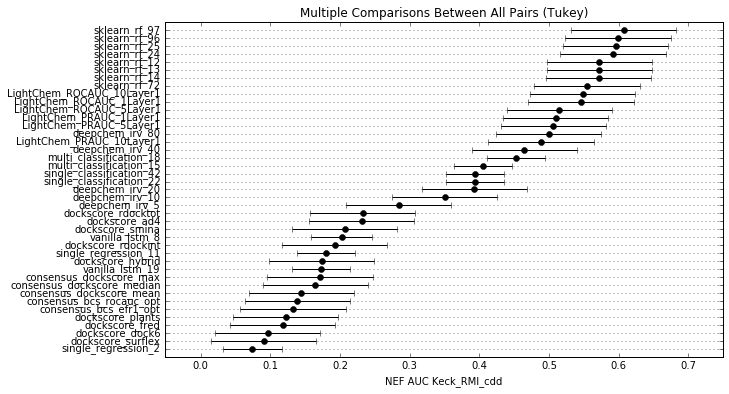

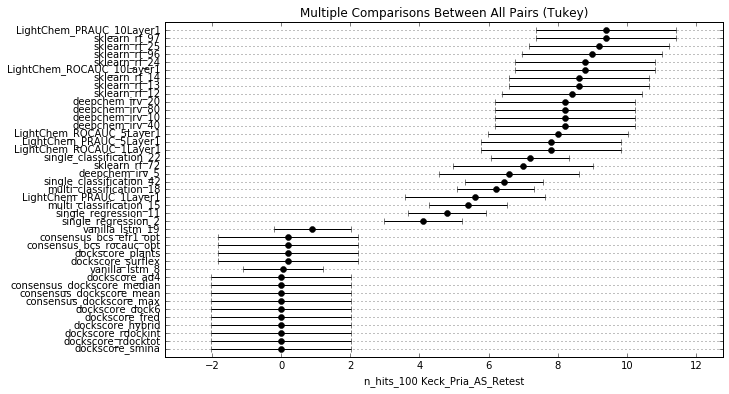

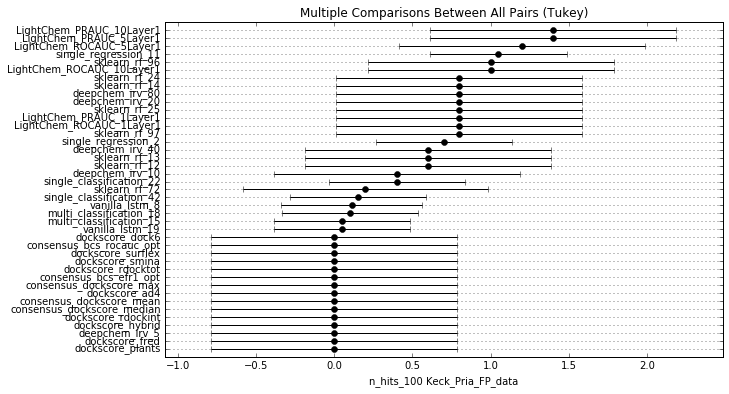

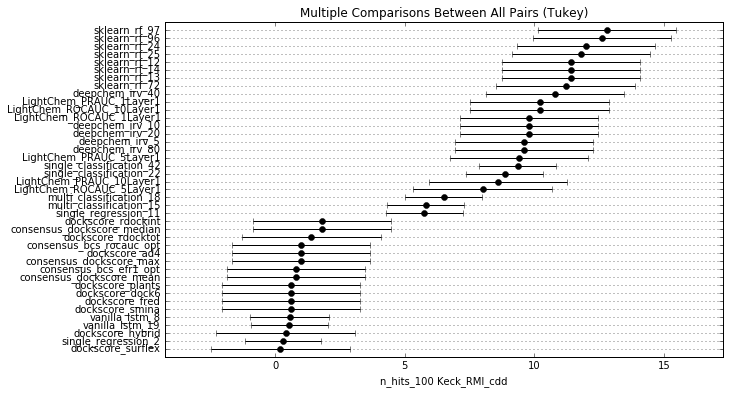

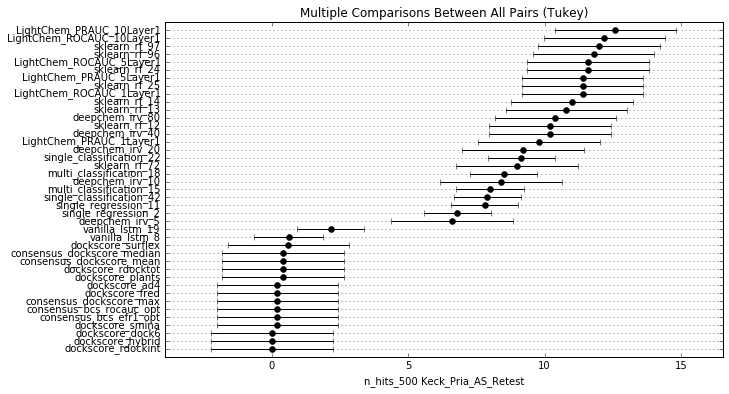

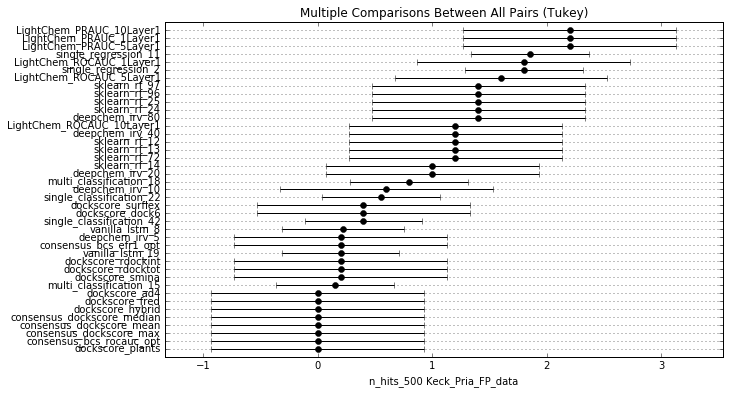

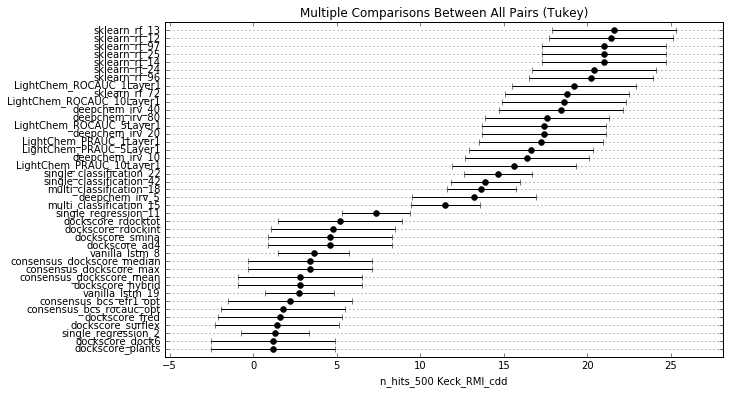

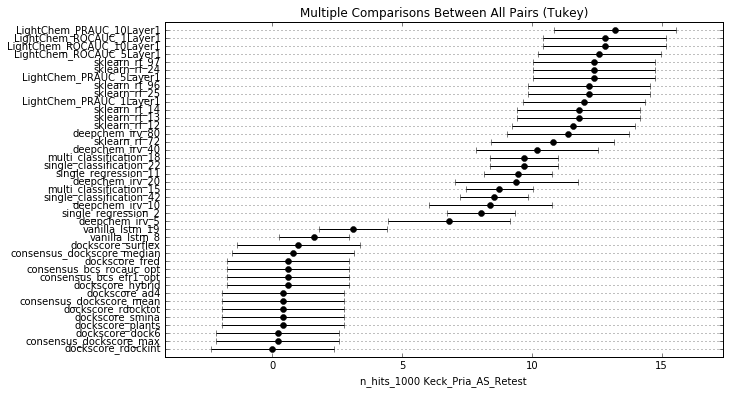

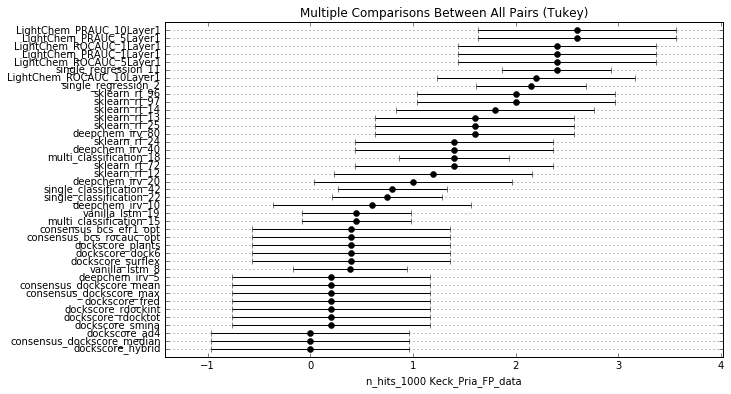

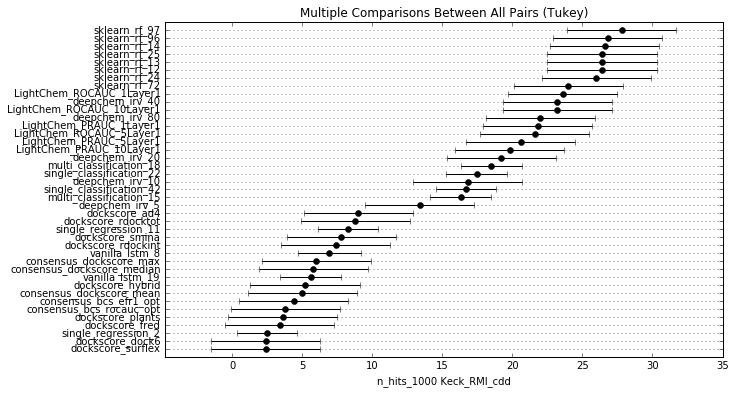

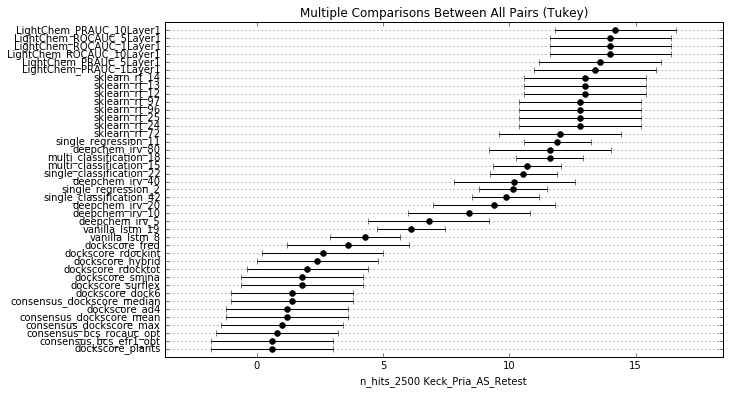

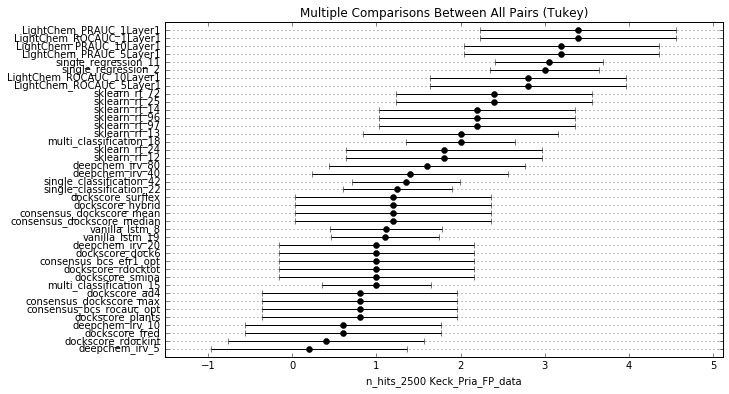

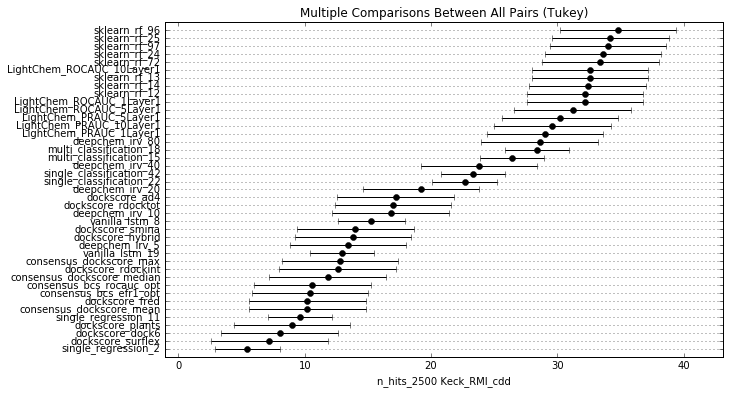

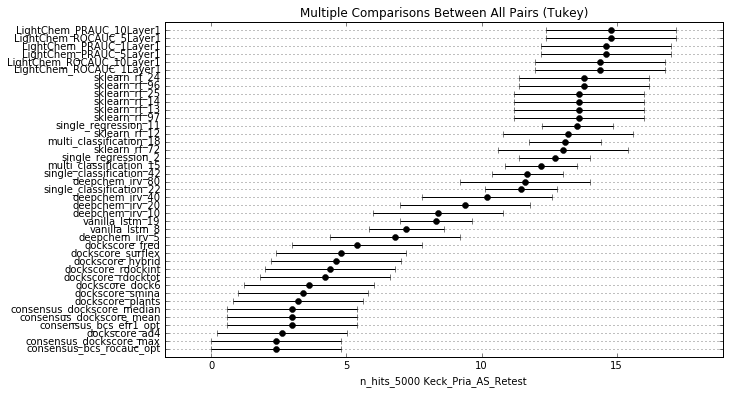

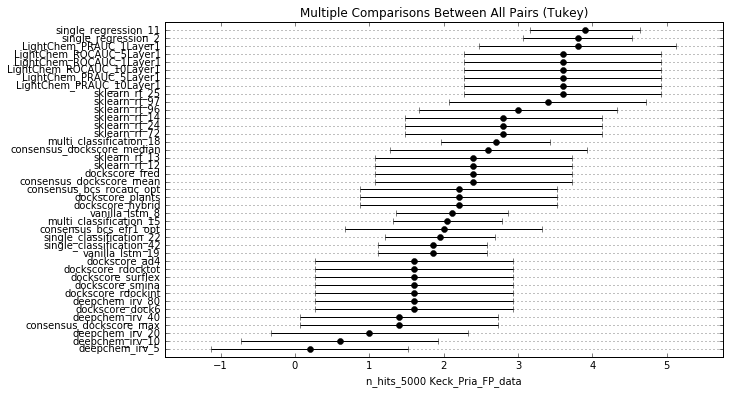

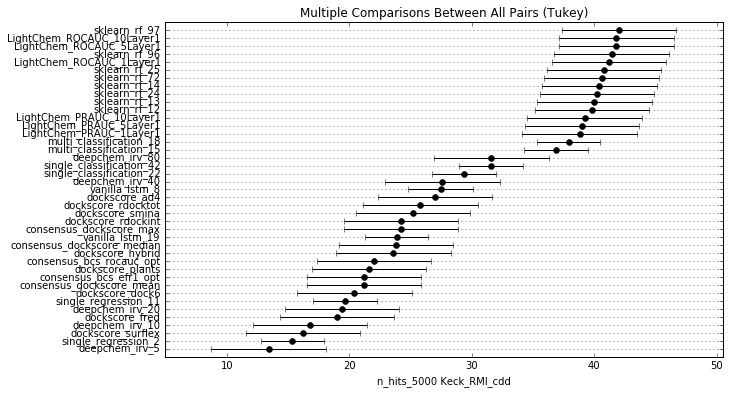

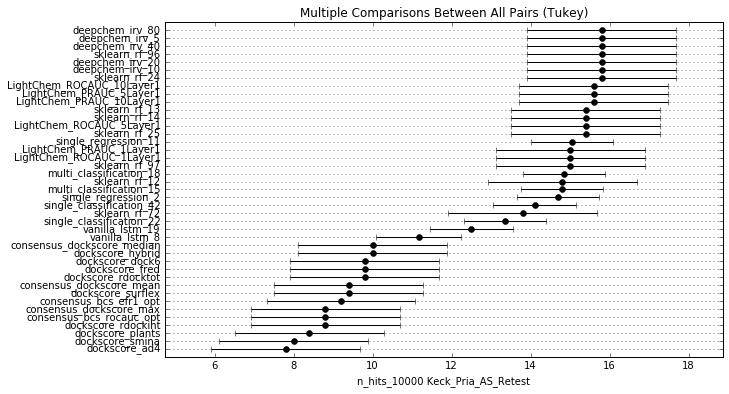

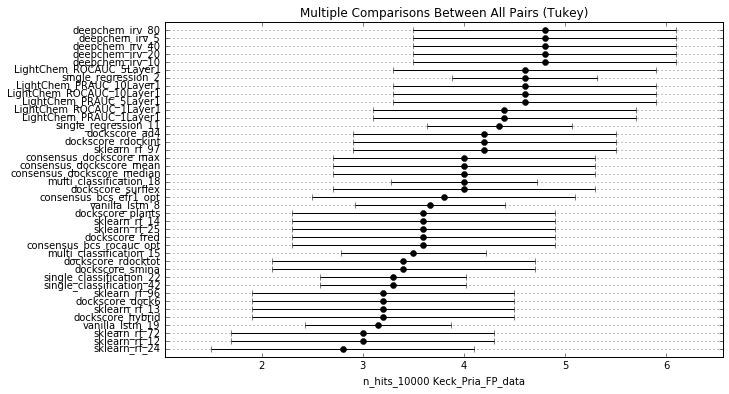

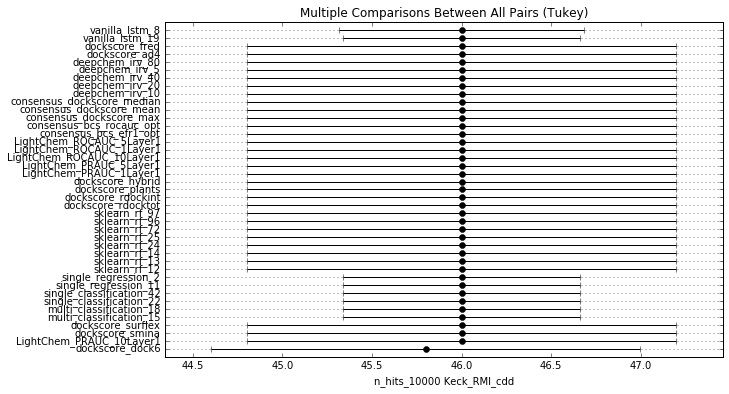

In [3]:
#plot uconf for all metrics
plot_uconf_simple(tukey_dict, metric_names, figsize=(10,6))

####  The confidence intervals are computed for the 'means' at the 0.05 significance using Tukey's Q critical value, so this confidence interval will capture the true-mean 95% of the time. If confidence intervals don't overlap, then we can conclude there is significance.

[1] Hochberg, Y., and A. C. Tamhane. Multiple Comparison Procedures.
           Hoboken, NJ: John Wiley & Sons, 1987.

---
## Model Ordering by Metric (Best-to-Worst)

In [4]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

,ROC AUC Keck_Pria_AS_Retest,ROC AUC Keck_Pria_FP_data,ROC AUC Keck_RMI_cdd,BEDROC AUC Keck_Pria_AS_Retest,BEDROC AUC Keck_Pria_FP_data,BEDROC AUC Keck_RMI_cdd,PR auc.integral Keck_Pria_AS_Retest,PR auc.integral Keck_Pria_FP_data,PR auc.integral Keck_RMI_cdd,NEF_0.1 % Keck_Pria_AS_Retest,...,n_hits_1000 Keck_RMI_cdd,n_hits_2500 Keck_Pria_AS_Retest,n_hits_2500 Keck_Pria_FP_data,n_hits_2500 Keck_RMI_cdd,n_hits_5000 Keck_Pria_AS_Retest,n_hits_5000 Keck_Pria_FP_data,n_hits_5000 Keck_RMI_cdd,n_hits_10000 Keck_Pria_AS_Retest,n_hits_10000 Keck_Pria_FP_data,n_hits_10000 Keck_RMI_cdd
0,LightChem_PRAUC_5Layer1,single_regression_11,sklearn_rf_97,LightChem_PRAUC_10Layer1,LightChem_PRAUC_10Layer1,sklearn_rf_97,sklearn_rf_96,single_regression_2,sklearn_rf_13,sklearn_rf_96,...,sklearn_rf_97,LightChem_PRAUC_10Layer1,single_regression_11,sklearn_rf_96,LightChem_PRAUC_10Layer1,single_regression_2,sklearn_rf_97,LightChem_PRAUC_10Layer1,single_regression_2,vanilla_lstm_8
1,LightChem_PRAUC_10Layer1,single_regression_2,sklearn_rf_96,LightChem_ROCAUC_10Layer1,LightChem_PRAUC_5Layer1,sklearn_rf_72,sklearn_rf_97,LightChem_PRAUC_10Layer1,sklearn_rf_12,sklearn_rf_97,...,sklearn_rf_96,LightChem_ROCAUC_10Layer1,LightChem_PRAUC_1Layer1,sklearn_rf_97,LightChem_PRAUC_1Layer1,single_regression_11,LightChem_ROCAUC_5Layer1,deepchem_irv_5,deepchem_irv_5,dockscore_hybrid
2,LightChem_ROCAUC_10Layer1,LightChem_PRAUC_10Layer1,sklearn_rf_72,sklearn_rf_97,single_regression_11,sklearn_rf_96,sklearn_rf_25,LightChem_PRAUC_5Layer1,sklearn_rf_14,sklearn_rf_25,...,sklearn_rf_25,LightChem_ROCAUC_5Layer1,single_regression_2,sklearn_rf_25,LightChem_ROCAUC_1Layer1,LightChem_PRAUC_1Layer1,LightChem_ROCAUC_10Layer1,deepchem_irv_40,deepchem_irv_80,dockscore_dock6
3,LightChem_ROCAUC_5Layer1,LightChem_PRAUC_5Layer1,LightChem_ROCAUC_1Layer1,sklearn_rf_96,LightChem_PRAUC_1Layer1,sklearn_rf_25,sklearn_rf_24,sklearn_rf_96,sklearn_rf_25,sklearn_rf_24,...,sklearn_rf_14,LightChem_ROCAUC_1Layer1,LightChem_ROCAUC_1Layer1,sklearn_rf_72,LightChem_ROCAUC_10Layer1,sklearn_rf_97,sklearn_rf_96,deepchem_irv_20,deepchem_irv_20,dockscore_ad4
4,sklearn_rf_24,LightChem_ROCAUC_10Layer1,sklearn_rf_24,LightChem_ROCAUC_5Layer1,single_regression_2,sklearn_rf_24,sklearn_rf_14,sklearn_rf_97,sklearn_rf_24,sklearn_rf_14,...,sklearn_rf_24,LightChem_PRAUC_1Layer1,LightChem_PRAUC_5Layer1,sklearn_rf_24,LightChem_ROCAUC_5Layer1,LightChem_ROCAUC_5Layer1,LightChem_ROCAUC_1Layer1,deepchem_irv_10,deepchem_irv_10,deepchem_irv_80
5,sklearn_rf_25,LightChem_PRAUC_1Layer1,sklearn_rf_25,LightChem_ROCAUC_1Layer1,LightChem_ROCAUC_1Layer1,sklearn_rf_14,sklearn_rf_13,LightChem_ROCAUC_5Layer1,sklearn_rf_97,sklearn_rf_13,...,sklearn_rf_13,LightChem_PRAUC_5Layer1,LightChem_PRAUC_10Layer1,LightChem_ROCAUC_1Layer1,single_regression_11,LightChem_ROCAUC_1Layer1,sklearn_rf_72,LightChem_ROCAUC_10Layer1,deepchem_irv_40,deepchem_irv_5
6,LightChem_ROCAUC_1Layer1,LightChem_ROCAUC_1Layer1,LightChem_ROCAUC_10Layer1,sklearn_rf_24,LightChem_ROCAUC_5Layer1,sklearn_rf_13,sklearn_rf_12,sklearn_rf_24,sklearn_rf_96,sklearn_rf_12,...,sklearn_rf_12,sklearn_rf_97,LightChem_ROCAUC_10Layer1,sklearn_rf_14,LightChem_PRAUC_5Layer1,sklearn_rf_25,sklearn_rf_25,LightChem_PRAUC_5Layer1,multi_classification_18,deepchem_irv_40
7,sklearn_rf_97,LightChem_ROCAUC_5Layer1,sklearn_rf_14,LightChem_PRAUC_5Layer1,LightChem_ROCAUC_10Layer1,sklearn_rf_12,deepchem_irv_40,single_regression_11,LightChem_PRAUC_1Layer1,LightChem_PRAUC_10Layer1,...,sklearn_rf_72,sklearn_rf_24,LightChem_ROCAUC_5Layer1,sklearn_rf_13,sklearn_rf_24,LightChem_ROCAUC_10Layer1,sklearn_rf_14,deepchem_irv_80,dockscore_ad4,deepchem_irv_20
8,LightChem_PRAUC_1Layer1,multi_classification_18,sklearn_rf_13,sklearn_rf_25,sklearn_rf_96,LightChem_ROCAUC_10Layer1,deepchem_irv_10,sklearn_rf_25,single_classification_42,single_classification_22,...,LightChem_ROCAUC_1Layer1,sklearn_rf_14,sklearn_rf_25,sklearn_rf_12,sklearn_rf_25,LightChem_PRAUC_5Layer1,sklearn_rf_13,sklearn_rf_24,dockscore_fred,deepchem_irv_10
9,single_r

---
## Metrics Most Similar to N-Hits

In [5]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-18], metric_names[-18:])

,n_hits_100 Keck_Pria_AS_Retest,n_hits_100 Keck_Pria_FP_data,n_hits_100 Keck_RMI_cdd,n_hits_500 Keck_Pria_AS_Retest,n_hits_500 Keck_Pria_FP_data,n_hits_500 Keck_RMI_cdd,n_hits_1000 Keck_Pria_AS_Retest,n_hits_1000 Keck_Pria_FP_data,n_hits_1000 Keck_RMI_cdd,n_hits_2500 Keck_Pria_AS_Retest,n_hits_2500 Keck_Pria_FP_data,n_hits_2500 Keck_RMI_cdd,n_hits_5000 Keck_Pria_AS_Retest,n_hits_5000 Keck_Pria_FP_data,n_hits_5000 Keck_RMI_cdd,n_hits_10000 Keck_Pria_AS_Retest,n_hits_10000 Keck_Pria_FP_data,n_hits_10000 Keck_RMI_cdd
0,NEF_0.5 %,NEF_0.15 %,NEF_1 %,NEF_2 %,"NEF_0.1 %, NEF_0.15 %",NEF_5 %,NEF_10 %,NEF_0.15 %,BEDROC AUC,NEF_10 %,NEF_0.15 %,NEF_20 %,NEF_20 %,"NEF_0.1 %, NEF_0.15 %",NEF_20 %,NEF_0.5 %,"NEF_0.1 %, NEF_0.15 %","ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ..."
1,NEF_1 %,NEF_0.5 %,NEF_0.5 %,NEF_5 %,NEF_2 %,NEF_2 %,NEF AUC,NEF_0.1 %,NEF_10 %,NEF_20 %,NEF_0.1 %,ROC AUC,NEF_10 %,NEF_20 %,ROC AUC,NEF_1 %,NEF_0.5 %,
2,NEF_0.15 %,NEF_1 %,NEF_2 %,BEDROC AUC,NEF AUC,BEDROC AUC,NEF_5 %,NEF_10 %,NEF_5 %,NEF AUC,NEF_10 %,NEF AUC,ROC AUC,NEF_0.5 %,NEF AUC,NEF_0.15 %,NEF_1 %,
3,NEF_0.1 %,NEF_0.1 %,NEF_0.1 %,NEF_10 %,"BEDROC AUC, NEF_5 %, NEF_10 %",NEF_10 %,BEDROC AUC,NEF AUC,NEF AUC,NEF_5 %,NEF_20 %,NEF_10 %,NEF_5 %,NEF_5 %,NEF_10 %,NEF_0.1 %,NEF_2 %,
4,PR auc.integral,"PR auc.integral, NEF_2 %",PR auc.integral,NEF AUC,NEF_1 %,NEF AUC,ROC AUC,BEDROC AUC,NEF_2 %,BEDROC AUC,"NEF_5 %, NEF AUC",BEDROC AUC,NEF AUC,NEF_2 %,BEDROC AUC,NEF_2 %,NEF_5 %,
5,NEF_2 %,BEDROC AUC,NEF_0.15 %,NEF_1 %,NEF_0.5 %,NEF_1 %,NEF_20 %,NEF_5 %,ROC AUC,ROC AUC,NEF_2 %,NEF_5 %,NEF_2 %,NEF_1 %,"NEF_2 %, NEF_5 %",NEF_5 %,NEF_10 %,
6,NEF_5 %,NEF_5 %,NEF_5 %,ROC AUC,ROC AUC,PR auc.integral,NEF_2 %,ROC AUC,NEF_1 %,NEF_2 %,ROC AUC,NEF_2 %,BEDROC AUC,NEF_10 %,NEF_0.1 %,ROC AUC,ROC AUC,
7,BEDROC AUC,NEF_10 %,BEDROC AUC,NEF_0.5 %,PR auc.integral,"NEF_0.1 %, NEF_0.5 %",NEF_1 %,NEF_2 %,NEF_0.1 %,NEF_1 %,NEF_0.5 %,NEF_0.1 %,NEF_1 %,ROC AUC,NEF_0.15 %,NEF_10 %,PR auc.integral,
8,NEF_10 %,NEF AUC,NEF_10 %,NEF_20 %,NEF_20 %,NEF_0.15 %,NEF_0.5 %,NEF_1 %,NEF_20 %,NEF_0.15 %,BEDROC AUC,NEF_1 %,NEF_0.5 %,NEF AUC,NEF_1 %,NEF_20 %,NEF AUC,
9,NEF AUC,ROC AUC,NEF AUC,NEF_0.15 %,,ROC AUC,NEF_0.15 %,NEF_20 %,PR auc.integral,NEF_0.5 %,NEF_1 %,PR auc.integral,NEF_0.15 %,BEDROC AUC,NEF_0.5 %,PR auc.integral,"BEDROC AUC, NEF_20 %",


---
## Overlapping top 1 models over all metrics

In [6]:
overlapping_models

,overlap_perc
LightChem_PRAUC_10Layer1,0.280899
sklearn_rf_97,0.247191
sklearn_rf_96,0.101124
LightChem_ROCAUC_1Layer1,0.078652
single_regression_2,0.067416
single_regression_11,0.067416
LightChem_ROCAUC_10Layer1,0.033708
vanilla_lstm_8,0.022472
sklearn_rf_13,0.022472
sklearn_rf_25,0.022472


In [7]:
get_overlap(agg_comp_dict, N=5)

,overlap_perc
sklearn_rf_97,0.550562
LightChem_PRAUC_10Layer1,0.516854
sklearn_rf_96,0.494382
LightChem_ROCAUC_10Layer1,0.348315
sklearn_rf_25,0.348315
LightChem_ROCAUC_1Layer1,0.348315
LightChem_PRAUC_5Layer1,0.348315
sklearn_rf_24,0.303371
LightChem_ROCAUC_5Layer1,0.303371
LightChem_PRAUC_1Layer1,0.179775
